### Sentiment_Analysis_Logistic_Regression_Classifier

#### Sentiment Analysis with Mobile review data from Amazon https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

### Packages Imports

In [10]:
# packages imports

import pandas as pd
import re

# plotting libraries
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

# model training related packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve

# natural language toolkit packages
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# saving model
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#convert jupyter notebook into html file
# !jupyter nbconvert --to html Sentiment_Analysis_Logistic_Regression_Classifier.ipynb

### Reading Data from CSV file

In [12]:
# importing the dataset using Pandas and creating a dataframe
df = pd.read_csv("Cleaned_mobile_unlocked.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
#viewing the first five records of the dataframe
df.head()

,rating,review
0,5,feel lucky found used phone u not used hard ph...
1,4,nice phone nice grade pantach revue clean set ...
2,5,pleased
3,4,work good go slow sometimes good phone love
4,4,great phone replace lost phone thing volume bu...


In [13]:
# displaying the first five entries of the review column
for text in df['review'].head(5):
    print(text)
    print('\n')

feel lucky found used phone u not used hard phone line someone upgraded sold one son liked old one finally fell apart 2 5 year didn want upgrade thank seller really appreciate honesty said used phone recommend seller highly would


nice phone nice grade pantach revue clean set easy set never android phone fantastic say least perfect size surfing social medium great phone samsung


pleased


work good go slow sometimes good phone love


great phone replace lost phone thing volume button not work still go setting adjust job eligible upgrade phone thaanks




### Viewing and Analyzing the data

In [14]:
# viewing the distribution of the ratings across the dataframes
df.rating.value_counts()

5    223580
1     72337
4     61374
3     31763
2     24724
Name: rating, dtype: int64

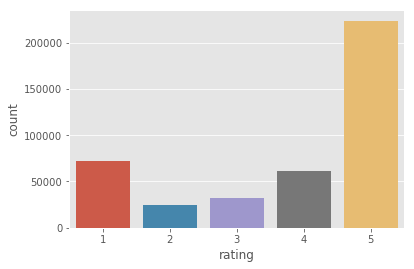

In [15]:
# plotting the distribution of the ratings across the dataframes
sns.countplot(df['rating'])

### Data Preprocessing

In [16]:
# filtering out the neutral reviews
df = df[df['rating']!=3]

#Encode 4 star and 5 star as positively rated 1.
#Encode 1 star and 2 star as poorely rated 0.
df['positivity'] = np.where(df['rating']>3,1,0)
df.head(10)

,rating,review,positivity
0,5,feel lucky found used phone u not used hard ph...,1
1,4,nice phone nice grade pantach revue clean set ...,1
2,5,pleased,1
3,4,work good go slow sometimes good phone love,1
4,4,great phone replace lost phone thing volume bu...,1
5,1,already phone problem know stated used dang no...,0
6,2,charging port loose got soldered needed new ba...,0
7,2,phone look good wouldn stay charged buy new ba...,0
8,5,originally using samsung s2 galaxy sprint want...,1
11,5,great product came two day ordering one little...,1


In [17]:
# tokenizing and stemming the reviews field 
def stem_text(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(w) for w in w_tokenizer.tokenize(text)])

# creating the feature field and the target field
X = pd.Series(data=[stem_text(text) for text in df['review'].values.astype(str)],index=df['positivity'].index)
y = df['positivity']


### Train test split

In [18]:
#spliting data into training and test set.
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
print('X shape',X.shape)
print('X_train shape',X_train.shape)
print('Y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('Y_test shape',y_test.shape)

X shape (382015,)
X_train shape (286511,)
Y_train shape (286511,)
X_test shape (95504,)
Y_test shape (95504,)


In [20]:
# creating the tfidf vectorizer for making the feature vector
vect = TfidfVectorizer(ngram_range=(1,3), min_df=5)
vect.fit(X_train.values.astype(str))

TfidfVectorizer(min_df=5, ngram_range=(1, 3))

In [21]:
#getting every 2000 vocabulay features.
vect.get_feature_names()[::2000]

['00',
 '18th amazon unfortun',
 '32gig storag',
 '60 day',
 'abl reproduc',
 'activ le',
 'advanc call',
 'almost 10',
 'also receiv time',
 'amazon contact seller',
 'android though',
 'anyth samsung',
 'app store not',
 'armorflex case',
 'attach phone',
 'awesom simpl',
 'bad given pro',
 'batteri die month',
 'beat great',
 'best valu get',
 'bigger button',
 'blown away',
 'bought amazon not',
 'box shelf',
 'brows experi',
 'button slower',
 'cach etc',
 'came everythin',
 'camera primari lens',
 'card good magnet',
 'carrier use',
 'cellphon also',
 'charg longer hour',
 'cheap replac',
 'clear end',
 'come close batteri',
 'compar reason',
 'con touch',
 'consid purchas',
 'corner also',
 'countri market no',
 'crystal clear screen',
 'data old samsung',
 'day suggest',
 'decir una',
 'describ deliv',
 'devic not charg',
 'differ part',
 'display iphon small',
 'dose',
 'due heavi',
 'easili cover',
 'email document',
 'enough see',
 'european charger doesn',
 'ever play',
 'e

In [22]:
#length of the feature vector
len(vect.get_feature_names())

404853

In [23]:
# transforming the feature vector
X_train_vectorized = vect.transform(X_train.values.astype(str))
X_train_vectorized

<286511x404853 sparse matrix of type '<class 'numpy.float64'>'
	with 11027680 stored elements in Compressed Sparse Row format>

In [24]:
with open(r"C:\Users\Aishwarya\PROJECTS\NLP\main\V1\models\tfidf_vectorizer.pk", 'wb') as fin:
    pickle.dump(vect, fin)

### Logistic Regression Classifier

In [29]:
# creating the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_vectorized,y_train)

C:\Users\Aishwarya\.conda\envs\bujji\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
# predicting the test data and checking 
predictions_lr = model_lr.predict(vect.transform(X_test.values.astype(str)))
AUC_lr = roc_auc_score(y_test,predictions_lr)
print('AUC: ',roc_auc_score(y_test,predictions_lr))

AUC:  0.952014125232856


In [31]:
# getting the feature names
feature_names = np.array(vect.get_feature_names())

# sort the coffecient from the model.
sorted_coef_index = model_lr.coef_[0].argsort()

'''Find the 10 smallest and 10 largest coefficients.
 The 10 largest coefficients are being indexed using [:-11:-1] 
 so the list returned is in order of largest to smallest.'''

print('Smallest Coefficient(Negative reviews): \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coeffiecient(Positive reviews): \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefficient(Negative reviews): 
['not' 'return' 'disappoint' 'worst' 'not happi' 'horribl' 'poor'
 'terribl' 'wast' 'not work']

Largest Coeffiecient(Positive reviews): 
['love' 'great' 'excel' 'perfect' 'best' 'far' 'no problem' 'happi' 'amaz'
 'easi']


In [32]:
filename = r'C:\Users\Aishwarya\PROJECTS\NLP\main\V1\models\model_lr_v1'
pickle.dump(model_lr, open(filename, 'wb'))

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared = mean_squared_error(y_test,predictions_lr)
mean_squared

0.03331797621042051

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,predictions_lr)

0.9666820237895795

### Instant run 

In [51]:
def stem_text(text):
    stemmer = PorterStemmer()
    return [" ".join([stemmer.stem(w) for w in text.lower().split()])]

def clean_and_remove_punctuations(text):
    lemmatizer = WordNetLemmatizer() 
    row = re.sub(r"[^a-zA-Z0-9]+", ' ', text).lower().split()
    lst = " ".join([lemmatizer.lemmatize(x) for x in row])
    return lst

In [52]:
filename = r"C:\Users\Aishwarya\PROJECTS\NLP\main\V1\models\model_lr_v1"
model_lr_v1 = pickle.load(open(filename, 'rb'))


In [53]:
vect = pd.read_pickle(r"C:\Users\Aishwarya\PROJECTS\NLP\main\V1\models\tfidf_vectorizer.pk")

In [54]:
text = "awesome"
clean = clean_and_remove_punctuations(text)
print(clean)
result = model_lr_v1.predict(vect.transform(stem_text(clean)))
print(result)

awesome
[1]
